In [35]:
#Import Libraries
import os
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import randint
import random
from sklearn.ensemble import RandomForestClassifier


In [36]:
#Import Dataset 
DATA_DIR = os.path.join('..','CW','we_data')
data_path = {'train': os.path.join(DATA_DIR, 'train.csv'),
             'validation': os.path.join(DATA_DIR, 'validation.csv'),
            'test': os.path.join(DATA_DIR, 'test.csv'),
            'group_xx': os.path.join(DATA_DIR, 'Group_xx.csv')}
 
train = pd.read_csv(data_path['train'])
validation = pd.read_csv(data_path['validation'])
test = pd.read_csv(data_path['test'])
group_xx = pd.read_csv(data_path['group_xx'])


In [37]:
# Get the first 20 dataset to see the format
train.head(20)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        float64
domain            object
url               object
urlid             float64
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: float64(2), int64(11), object(12)
memory usage: 463.7+ MB


In [39]:
""" defining the data exploreDatasets function to 
examine the basic stats of the given data """
def exploreDatasets(dataFrame):
    #dataframe
    basic_stats = pd.DataFrame()
    basic_stats['advertiser'] = np.sort(train.advertiser.unique())
    clicks = dataFrame.groupby('advertiser').click.value_counts()
    sara = clicks.index.get_level_values('click') == 1
    pay_prices = dataFrame.groupby('advertiser').payprice.sum().values
    basic_stats['clicks'] = clicks.iloc[sara].values 
    basic_stats['impressions'] = dataFrame.groupby('advertiser').size().values
    basic_stats['cost'] = (pay_prices/1000)
    basic_stats['CTR'] = (((basic_stats.clicks * 100 / basic_stats.impressions)))
    basic_stats['CPM'] = (((basic_stats.cost *1000 / basic_stats.impressions)))
    basic_stats['eCPC'] = ((basic_stats.cost / basic_stats.clicks))
    return basic_stats

In [40]:
exploreDatasets(train)

,advertiser,clicks,impressions,cost,CTR,CPM,eCPC
0,1458,385,492353,33968.736,0.078196,68.992646,88.230483
1,2259,43,133673,12428.238,0.032168,92.974931,289.028791
2,2261,36,110122,9873.779,0.032691,89.662184,274.271639
3,2821,131,211366,18828.044,0.061978,89.077922,143.725527
4,2997,217,49829,3129.267,0.435489,62.800116,14.420585
5,3358,202,264956,22447.231,0.076239,84.720599,111.124906
6,3386,320,455041,34931.823,0.070323,76.766320,109.161947
7,3427,272,402806,30458.711,0.067526,75.616329,111.980555
8,3476,187,310835,23918.779,0.060161,76.950083,127.907909


As we can see from the above table advertiser 1458 has the highest impressions and clicks followed by advertiser 3386 and 3427 respectively.  

In [41]:
#exploreDatasets(validation)

# Further analysis on user feedback

In [42]:
def daily_CTR(dataFrame):
    CTR_daily = pd.DataFrame()
    CTR_daily['day'] = np.sort(dataFrame.weekday.unique())

    impressions_for_ad_1458 = dataFrame.groupby('weekday').advertiser.value_counts()
    CTR_daily['impressions_for_ad_1458'] = impressions_for_ad_1458.iloc[impressions_for_ad_1458.index.get_level_values('advertiser') == 1458].values 

    impressions_for_ad_3358 = dataFrame.groupby('weekday').advertiser.value_counts()
    CTR_daily['impressions_for_ad_3358'] = impressions_for_ad_3358.iloc[impressions_for_ad_3358.index.get_level_values('advertiser') == 3358].values 

    clickCount = dataFrame.groupby(['advertiser','weekday']).click.value_counts()
    clickses_for_ad_1458 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 1458]
    CTR_daily['clicks_for_ad_1458'] = clickses_for_ad_1458.iloc[clickses_for_ad_1458.index.get_level_values('click') == 1].values

    clickses_for_ad_3358 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 3358]
    CTR_daily['clicks_for_ad_3358'] = clickses_for_ad_3358.iloc[clickses_for_ad_3358.index.get_level_values('click') == 1].values

    CTR_daily['CTR_for_ad_1458'] = ((CTR_daily.clicks_for_ad_1458 / CTR_daily.impressions_for_ad_1458) ) 
    CTR_daily['CTR_for_ad_3358'] = ((CTR_daily.clicks_for_ad_3358 / CTR_daily.impressions_for_ad_3358) ) 
    return CTR_daily

In [70]:
daily_CTR(train)

,day,impressions_for_ad_1458,impressions_for_ad_3358,clicks_for_ad_1458,clicks_for_ad_3358,CTR_for_ad_1458,CTR_for_ad_3358
0,1,76372,29504,52,22,0.000681,0.000746
1,2,66245,26723,63,16,0.000951,0.000599
2,3,67985,22569,48,6,0.000706,0.000266
3,4,68874,71058,52,73,0.000755,0.001027
4,5,69881,35638,62,27,0.000887,0.000758
5,6,71634,50651,62,38,0.000866,0.000750
6,7,71362,28813,46,20,0.000645,0.000694


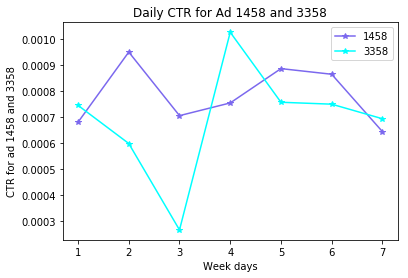

In [44]:
f, axis = plt.subplots(1)
axis.plot(1 + daily_CTR(train).day.values, daily_CTR(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
axis.plot(1 + daily_CTR(train).day.values, daily_CTR(train).CTR_for_ad_3358.values,marker='*', color = 'cyan', label='3358')
plt.legend()
plt.title('Daily CTR for Ad 1458 and 3358')
plt.ylabel('CTR for ad 1458 and 3358')
plt.xlabel('Week days')
plt.draw()
plt.show()

In [45]:
# def hourly_CTR(dataFrame):
#     CTR_hourly = pd.DataFrame()
#     CTR_hourly['hour'] = np.sort(dataFrame.hour.unique())

#     impressions_for_ad_1458 = dataFrame.groupby('hour').advertiser.value_counts()
#     CTR_hourly['impressions_for_ad_1458'] = impressions_for_ad_1458.iloc[impressions_for_ad_1458.index.get_level_values('advertiser') == 1458].values 

#     impressions_for_ad_3358 = dataFrame.groupby('hour').advertiser.value_counts()
#     CTR_hourly['impressions_for_ad_3358'] = impressions_for_ad_3358.iloc[impressions_for_ad_3358.index.get_level_values('advertiser') == 3358].values 

#     clickCount = dataFrame.groupby(['advertiser','hour']).click.value_counts()
#     clickses_for_ad_1458 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 1458]
#     CTR_hourly['clicks_for_ad_1458'] = clickses_for_ad_1458.iloc[clickses_for_ad_1458.index.get_level_values('click') == 1].values
#     #print(CTR_hourly['clicks_for_ad_1458'])
#     clickses_for_ad_3358 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 3358]
#     clicked_for_ad_3358 = list(clickses_for_ad_3358.iloc[clickses_for_ad_3358.index.get_level_values('click') == 1].values)
#     clicked_for_ad_3358 = clicked_for_ad_3358[:4] + [0] + clicked_for_ad_3358[4:]
#     CTR_hourly['clicks_for_ad_3358']  = clickses_for_ad_3358
#     # print(CTR_hourly['clicks_for_ad_3358'])

#     CTR_hourly['CTR_for_ad_1458'] = ((CTR_hourly.clicks_for_ad_1458 / CTR_hourly.impressions_for_ad_1458) ) 
#     CTR_hourly['CTR_for_ad_3358'] = ((CTR_hourly.clicks_for_ad_3358 / CTR_hourly.impressions_for_ad_3358) ) 
#     return CTR_hourly

In [46]:
#hourly_CTR(train)

In [48]:
#region_CTR(train)

,region,impressions_for_ad_1458,impressions_for_ad_3358,clicks_for_ad_1458,clicks_for_ad_3358,CTR_for_ad_1458,CTR_for_ad_3358
0,0,7131,5577,7126,5568,0.999299,0.998386
1,1,21360,10449,21344,10439,0.999251,0.999043
2,2,7969,4252,7966,4249,0.999624,0.999294
3,3,24605,11299,24585,11294,0.999187,0.999557
4,15,15076,7016,15062,7009,0.999071,0.999002
5,27,7050,3284,7048,3283,0.999716,0.999695
6,40,18564,7837,18554,7835,0.999461,0.999745
7,55,11053,4254,11049,4253,0.999638,0.999765
8,65,11692,4929,11681,4927,0.999059,0.999594
9,79,12974,8359,12961,8355,0.998998,0.999521


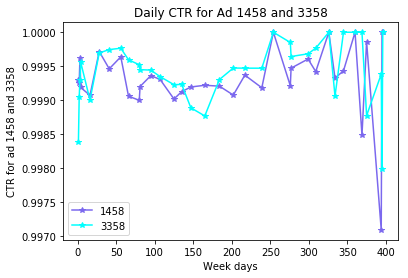

In [4]:
 def adexchange_CTR(dataFrame):
    CTR_adexchange = pd.DataFrame()
    CTR_adexchange['adexchange'] = np.sort(dataFrame.adexchange.unique())
    CTR_adexchange = CTR_adexchange.drop([3,4])
    impressions_for_ad_1458 = dataFrame.groupby('adexchange').advertiser.value_counts()
    CTR_adexchange['impressions_for_ad_1458'] = impressions_for_ad_1458.iloc[impressions_for_ad_1458.index.get_level_values('advertiser') == 1458].values 

    impressions_for_ad_3358 = dataFrame.groupby('adexchange').advertiser.value_counts()
    CTR_adexchange['impressions_for_ad_3358'] = impressions_for_ad_3358.iloc[impressions_for_ad_3358.index.get_level_values('advertiser') == 3358].values 

    clickCount = dataFrame.groupby(['advertiser','adexchange']).click.value_counts()
    clickses_for_ad_1458 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 1458]
    clickses_for_ad_1458.iloc[clickses_for_ad_1458.index.get_level_values('click') == 1]=1
    CTR_adexchange['clicks_for_ad_1458'] = clickses_for_ad_1458.groupby(level='adexchange').sum().values

    clickses_for_ad_3358 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 3358]
    clickses_for_ad_3358.iloc[clickses_for_ad_3358.index.get_level_values('click') == 1] =1
    CTR_adexchange['clicks_for_ad_3358'] = clickses_for_ad_3358.groupby(level='adexchange').sum().values

    CTR_adexchange['CTR_for_ad_1458'] = ((CTR_adexchange.clicks_for_ad_1458 / CTR_adexchange.impressions_for_ad_1458) ) 
    CTR_adexchange['CTR_for_ad_3358'] = ((CTR_adexchange.clicks_for_ad_3358 / CTR_adexchange.impressions_for_ad_3358) ) 
    return CTR_adexchange

In [5]:
adexchange_CTR(train)

NameError: name 'train' is not defined

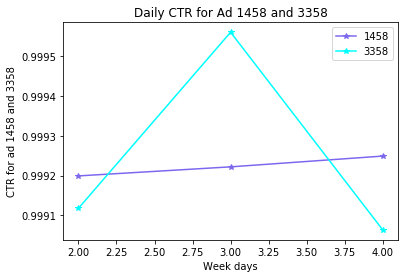

In [53]:
# def useragent_CTR(dataFrame):
#     CTR_useragent = pd.DataFrame()
#     CTR_useragent['useragent'] = np.sort(dataFrame.useragent.unique())
#     CTR_useragent = CTR_useragent.drop([12,18,25])
#     impressions_for_ad_1458 = dataFrame.groupby('useragent').advertiser.value_counts()
#     CTR_useragent['impressions_for_ad_1458'] = impressions_for_ad_1458.iloc[impressions_for_ad_1458.index.get_level_values('advertiser') == 1458].values 

#     impressions_for_ad_3358 = dataFrame.groupby('useragent').advertiser.value_counts()
#     impressions_for_ad_3358 = list(impressions_for_ad_3358.iloc[impressions_for_ad_3358.index.get_level_values('advertiser') == 3358].values)
#     impressions_for_ad_3358 = impressions_for_ad_3358[:22] + [0] + impressions_for_ad_3358[22:]
#     CTR_useragent['impressions_for_ad_3358'] = impressions_for_ad_3358
#     clickCount = dataFrame.groupby(['advertiser','useragent']).click.value_counts()
#     clickses_for_ad_1458 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 1458]
#     clickses_for_ad_1458.iloc[clickses_for_ad_1458.index.get_level_values('click') == 1]=1
#     clickses_for_ad_1458 = clickses_for_ad_1458.groupby(level='useragent').sum().values
#     clickses_for_ad_1458 = clickses_for_ad_1458[:22] + [0] + clickses_for_ad_1458[22:]
#     CTR_useragent['clicks_for_ad_1458'] = clickses_for_ad_1458
#     clickses_for_ad_3358 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 3358]
#     clickses_for_ad_3358.iloc[clickses_for_ad_3358.index.get_level_values('click') == 1] =1
#     CTR_useragent['clicks_for_ad_3358'] = clickses_for_ad_3358.groupby(level='useragent').sum().values

#     CTR_useragent['CTR_for_ad_1458'] = ((CTR_useragent.clicks_for_ad_1458 / CTR_useragent.impressions_for_ad_1458) ) 
#     CTR_useragent['CTR_for_ad_3358'] = ((CTR_useragent.clicks_for_ad_3358 / CTR_useragent.impressions_for_ad_3358) ) 
#     return CTR_useragent

In [54]:
# 

In [ ]:
def hourly_CTR(dataFrame):
    CTR_hourly = pd.DataFrame()
    CTR_hourly['hour'] = np.sort(dataFrame.hour.unique())

    impressions_for_ad_1458 = dataFrame.groupby('hour').advertiser.value_counts()
    CTR_hourly['impressions_for_ad_1458'] = impressions_for_ad_1458.iloc[impressions_for_ad_1458.index.get_level_values('advertiser') == 1458].values 

    impressions_for_ad_3358 = dataFrame.groupby('hour').advertiser.value_counts()
    CTR_hourly['impressions_for_ad_3358'] = impressions_for_ad_3358.iloc[impressions_for_ad_3358.index.get_level_values('advertiser') == 3358].values 

    clickCount = dataFrame.groupby(['advertiser','hour']).click.value_counts()
    clickses_for_ad_1458 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 1458]
    CTR_hourly['clicks_for_ad_1458'] = clickses_for_ad_1458.iloc[clickses_for_ad_1458.index.get_level_values('click') == 1].values
    #print(CTR_hourly['clicks_for_ad_1458'])
    clickses_for_ad_3358 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 3358]
    clicked_for_ad_3358 = list(clickses_for_ad_3358.iloc[clickses_for_ad_3358.index.get_level_values('click') == 1].values)
    clicked_for_ad_3358 = clicked_for_ad_3358[:4] + [0] + clicked_for_ad_3358[4:]
    CTR_hourly['clicks_for_ad_3358']  = clickses_for_ad_3358
    # print(CTR_hourly['clicks_for_ad_3358'])

    CTR_hourly['CTR_for_ad_1458'] = ((CTR_hourly.clicks_for_ad_1458 / CTR_hourly.impressions_for_ad_1458) ) 
    CTR_hourly['CTR_for_ad_3358'] = ((CTR_hourly.clicks_for_ad_3358 / CTR_hourly.impressions_for_ad_3358) ) 
    return CTR_hourly

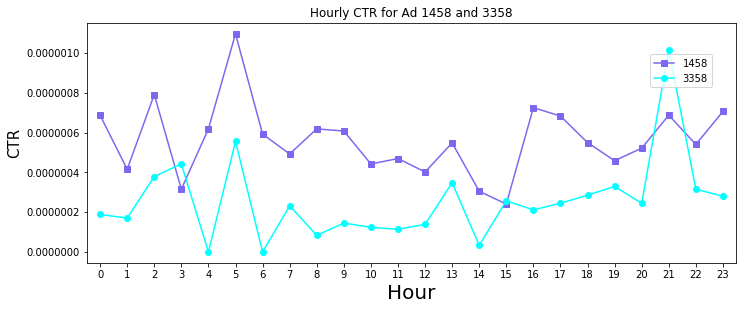

In [56]:

f, axis = plt.subplots(1)
axis.plot(1 + hourly_CTR(train).day.values, hourly_CTR(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
axis.plot(1 + hourly_CTR(train).day.values, hourly_CTR(train).CTR_for_ad_3358.values,marker='*', color = 'cyan', label='3358')
plt.legend()
plt.title('Hourly CTR for Ad 1458 and 3358')
plt.ylabel('CTR for ad 1458 and 3358')
plt.xlabel('Week days')
plt.draw()
plt.show()

In [ ]:
 def region_CTR(dataFrame):
    CTR_region = pd.DataFrame()
    CTR_region['region'] = np.sort(dataFrame.region.unique())

    impressions_for_ad_1458 = dataFrame.groupby('region').advertiser.value_counts()
    CTR_region['impressions_for_ad_1458'] = impressions_for_ad_1458.iloc[impressions_for_ad_1458.index.get_level_values('advertiser') == 1458].values 

    impressions_for_ad_3358 = dataFrame.groupby('region').advertiser.value_counts()
    CTR_region['impressions_for_ad_3358'] = impressions_for_ad_3358.iloc[impressions_for_ad_3358.index.get_level_values('advertiser') == 3358].values 

    clickCount = dataFrame.groupby(['advertiser','region']).click.value_counts()
    clickses_for_ad_1458 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 1458]
    clickses_for_ad_1458.iloc[clickses_for_ad_1458.index.get_level_values('click') == 1]=1
    CTR_region['clicks_for_ad_1458'] = clickses_for_ad_1458.groupby(level='region').sum().values

    clickses_for_ad_3358 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 3358]
    clickses_for_ad_3358.iloc[clickses_for_ad_3358.index.get_level_values('click') == 1] =1
    CTR_region['clicks_for_ad_3358'] = clickses_for_ad_3358.groupby(level='region').sum().values

    CTR_region['CTR_for_ad_1458'] = ((CTR_region.clicks_for_ad_1458 / CTR_region.impressions_for_ad_1458) ) 
    CTR_region['CTR_for_ad_3358'] = ((CTR_region.clicks_for_ad_3358 / CTR_region.impressions_for_ad_3358) ) 
    return CTR_region

In [ ]:
region_CTR(train)

,region,impressions_for_ad_1458,impressions_for_ad_3358,clicks_for_ad_1458,clicks_for_ad_3358,CTR_for_ad_1458,CTR_for_ad_3358
0,0,7131,5577,7126,5568,0.999299,0.998386
1,1,21360,10449,21344,10439,0.999251,0.999043
2,2,7969,4252,7966,4249,0.999624,0.999294
3,3,24605,11299,24585,11294,0.999187,0.999557
4,15,15076,7016,15062,7009,0.999071,0.999002
5,27,7050,3284,7048,3283,0.999716,0.999695
6,40,18564,7837,18554,7835,0.999461,0.999745
7,55,11053,4254,11049,4253,0.999638,0.999765
8,65,11692,4929,11681,4927,0.999059,0.999594
9,79,12974,8359,12961,8355,0.998998,0.999521


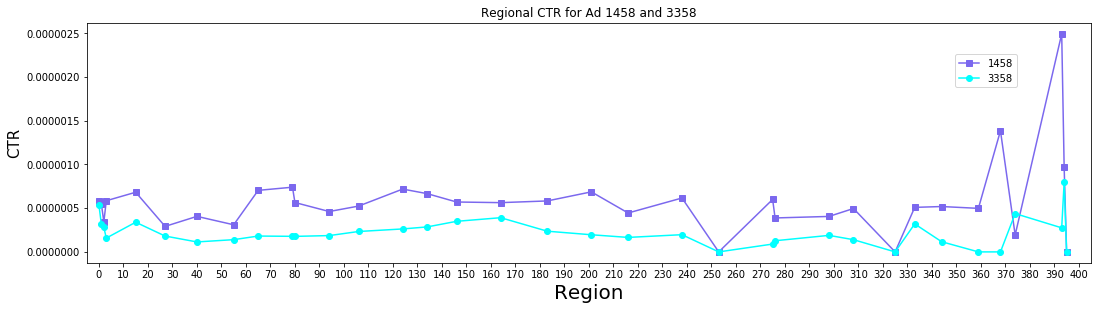

In [58]:
f, axis = plt.subplots(1)
axis.plot(1 + hourly_CTR(train).day.values, hourly_CTR(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
axis.plot(1 + hourly_CTR(train).day.values, hourly_CTR(train).CTR_for_ad_3358.values,marker='*', color = 'cyan', label='3358')
plt.legend()
plt.title('Regional CTR for Ad 1458 and 3358')
plt.ylabel('CTR')
plt.xlabel('Week days')
plt.draw()
plt.show()

In [ ]:
def adexchange_CTR(dataFrame):
    CTR_adexchange = pd.DataFrame()
    CTR_adexchange['adexchange'] = np.sort(dataFrame.adexchange.unique())
    CTR_adexchange = CTR_adexchange.drop([3,4])
    impressions_for_ad_1458 = dataFrame.groupby('adexchange').advertiser.value_counts()
    CTR_adexchange['impressions_for_ad_1458'] = impressions_for_ad_1458.iloc[impressions_for_ad_1458.index.get_level_values('advertiser') == 1458].values 

    impressions_for_ad_3358 = dataFrame.groupby('adexchange').advertiser.value_counts()
    CTR_adexchange['impressions_for_ad_3358'] = impressions_for_ad_3358.iloc[impressions_for_ad_3358.index.get_level_values('advertiser') == 3358].values 

    clickCount = dataFrame.groupby(['advertiser','adexchange']).click.value_counts()
    clickses_for_ad_1458 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 1458]
    clickses_for_ad_1458.iloc[clickses_for_ad_1458.index.get_level_values('click') == 1]=1
    CTR_adexchange['clicks_for_ad_1458'] = clickses_for_ad_1458.groupby(level='adexchange').sum().values

    clickses_for_ad_3358 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 3358]
    clickses_for_ad_3358.iloc[clickses_for_ad_3358.index.get_level_values('click') == 1] =1
    CTR_adexchange['clicks_for_ad_3358'] = clickses_for_ad_3358.groupby(level='adexchange').sum().values

    CTR_adexchange['CTR_for_ad_1458'] = ((CTR_adexchange.clicks_for_ad_1458 / CTR_adexchange.impressions_for_ad_1458) ) 
    CTR_adexchange['CTR_for_ad_3358'] = ((CTR_adexchange.clicks_for_ad_3358 / CTR_adexchange.impressions_for_ad_3358) ) 
    return CTR_adexchange

In [59]:
adexchange_CTR(train)

,adexchange,impressions_for_ad_1458,impressions_for_ad_3358,clicks_for_ad_1458,clicks_for_ad_3358,CTR_for_ad_1458,CTR_for_ad_3358
0,1.0,166065,133697,165932,133579,0.999199,0.999117
1,2.0,146513,84300,146399,84263,0.999222,0.999561
2,3.0,179775,46959,179640,46915,0.999249,0.999063


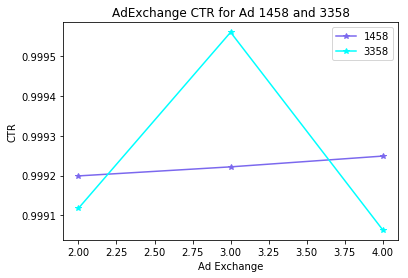

In [71]:
f, axis = plt.subplots(1)
axis.plot(1 + adexchange_CTR(train).adexchange.values, adexchange_CTR(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
axis.plot(1 + adexchange_CTR(train).adexchange.values, adexchange_CTR(train).CTR_for_ad_3358.values,marker='*',color = 'cyan', label='3358')
plt.legend()
plt.title('AdExchange CTR for Ad 1458 and 3358')
plt.ylabel('CTR')
plt.xlabel('Ad Exchange')
plt.draw()
plt.show()

In [ ]:
def slotwidth_CTR(dataFrame):
    CTR_slotwidthn = pd.DataFrame()
    CTR_slotwidth['region'] = np.sort(dataFrame.region.unique())

    impressions_for_ad_1458 = dataFrame.groupby('region').advertiser.value_counts()
    CTR_slotwidth['impressions_for_ad_1458'] = impressions_for_ad_1458.iloc[impressions_for_ad_1458.index.get_level_values('advertiser') == 1458].values 

    impressions_for_ad_3358 = dataFrame.groupby('region').advertiser.value_counts()
    CTR_slotwidth['impressions_for_ad_3358'] = impressions_for_ad_3358.iloc[impressions_for_ad_3358.index.get_level_values('advertiser') == 3358].values 

    clickCount = dataFrame.groupby(['advertiser','region']).click.value_counts()
    clickses_for_ad_1458 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 1458]
    clickses_for_ad_1458.iloc[clickses_for_ad_1458.index.get_level_values('click') == 1]=1
    CTR_region['clicks_for_ad_1458'] = clickses_for_ad_1458.groupby(level='region').sum().values

    clickses_for_ad_3358 = clickCount.iloc[clickCount.index.get_level_values('advertiser') == 3358]
    clickses_for_ad_3358.iloc[clickses_for_ad_3358.index.get_level_values('click') == 1] =1
    CTR_region['clicks_for_ad_3358'] = clickses_for_ad_3358.groupby(level='region').sum().values

    CTR_slotwidth['CTR_for_ad_1458'] = ((CTR_region.clicks_for_ad_1458 / CTR_region.impressions_for_ad_1458) ) 
    CTR_slotwidth['CTR_for_ad_3358'] = ((CTR_region.clicks_for_ad_3358 / CTR_region.impressions_for_ad_3358) ) 
    return CTR_region

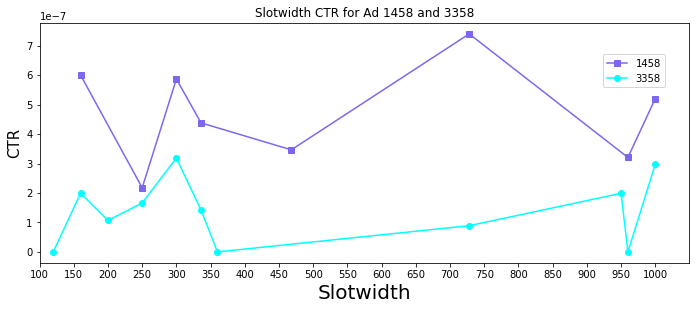

In [61]:
f, axis = plt.subplots(1)
axis.plot(1 + hourly_CTR(train).day.values, hourly_CTR(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
axis.plot(1 + hourly_CTR(train).day.values, hourly_CTR(train).CTR_for_ad_3358.values,marker='*', color = 'cyan', label='3358')
plt.legend()
plt.title('Slotwidth CTR for Ad 1458 and 3358')
plt.ylabel('CTR')
plt.xlabel('Slotwidth')
plt.draw()
plt.show()

In [2]:
#exploreDatasets(train)

# Price




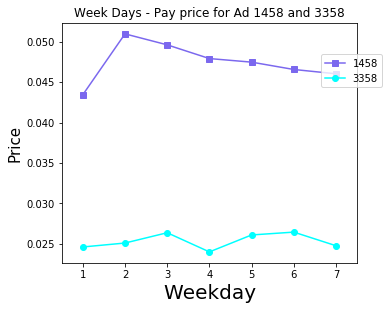

In [63]:
#f, axis = plt.subplots(1)
# axis.plot(1 + weekDay_price(train).day.values, weekDay_price(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
# axis.plot(1 + weekDay_price(train).day.values, weekDay_price(train).CTR_for_ad_3358.values,marker='*', color = 'cyan', label='3358')
# plt.legend()
# plt.title('Week Days - Pay price for Ad 1458 and 3358')
# plt.ylabel('Price')
# plt.xlabel('Weekday')
# plt.draw()
# plt.show()

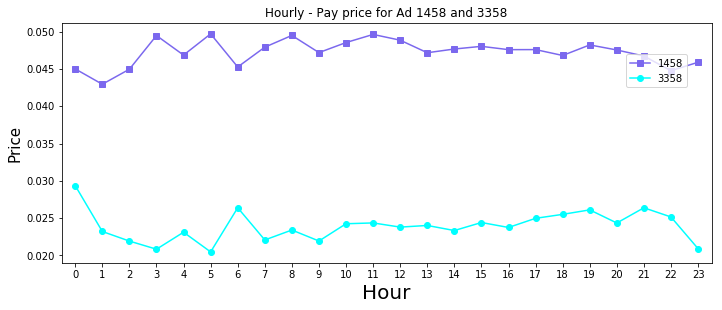

In [64]:
f, axis = plt.subplots(1)
axis.plot(1 + Hourly_price(train).day.values, Hourly_price(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
axis.plot(1 + Hourly_price(train).day.values, Hourly_price(train).CTR_for_ad_3358.values,marker='*', color = 'cyan', label='3358')
plt.legend()
plt.title('Hourly - Pay price for Ad 1458 and 3358')
plt.ylabel('Price')
plt.xlabel('Hour')
plt.draw()
plt.show()

In [74]:
region_price(train)

,region,impressions_for_ad_1458,impressions_for_ad_3358,clicks_for_ad_1458,clicks_for_ad_3358,CTR_for_ad_1458,CTR_for_ad_3358
0,0,7131,5577,7126,5568,0.999299,0.998386
1,1,21360,10449,21344,10439,0.999251,0.999043
2,2,7969,4252,7966,4249,0.999624,0.999294
3,3,24605,11299,24585,11294,0.999187,0.999557
4,15,15076,7016,15062,7009,0.999071,0.999002
5,27,7050,3284,7048,3283,0.999716,0.999695
6,40,18564,7837,18554,7835,0.999461,0.999745
7,55,11053,4254,11049,4253,0.999638,0.999765
8,65,11692,4929,11681,4927,0.999059,0.999594
9,79,12974,8359,12961,8355,0.998998,0.999521


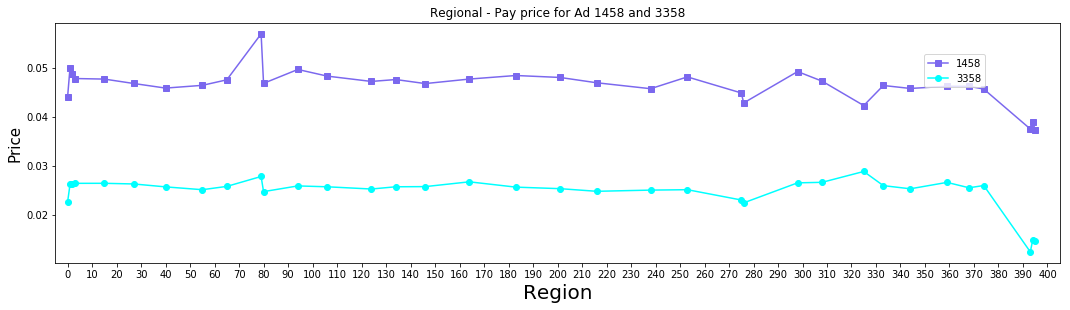

In [66]:
f, axis = plt.subplots(1)
axis.plot(1 + Regional_price(train).day.values, Regional_price(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
axis.plot(1 + Regional_price(train).day.values, Regional_price(train).CTR_for_ad_3358.values,marker='*', color = 'cyan', label='3358')
plt.legend()
plt.title('Regional - Pay price for Ad 1458 and 3358')
plt.ylabel('Price')
plt.xlabel('Regional')
plt.draw()
plt.show()

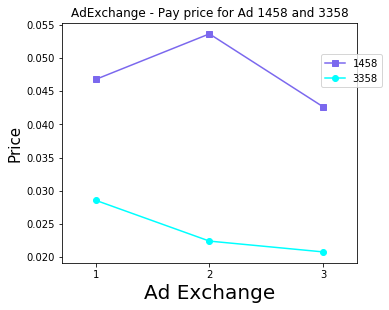

In [67]:
f, axis = plt.subplots(1)
axis.plot(1 + AdExchange_price(train).day.values, AdExchange_price(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
axis.plot(1 + AdExchange_price(train).day.values, AdExchange_price(train).CTR_for_ad_3358.values,marker='*', color = 'cyan', label='3358')
plt.legend()
plt.title('AdExchange - Pay price for Ad 1458 and 3358')
plt.ylabel('Price')
plt.xlabel('AdExchange')
plt.draw()
plt.show()

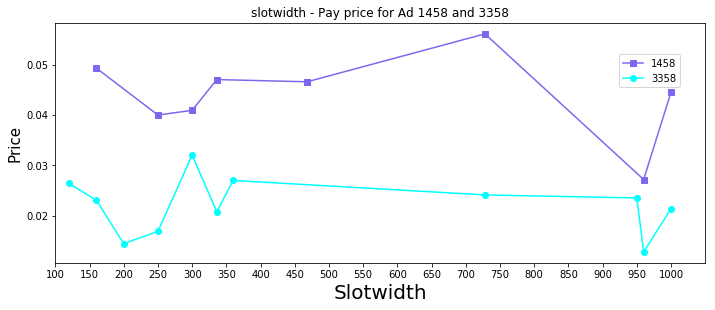

In [68]:
f, axis = plt.subplots(1)
axis.plot(1 + slotwidth_price(train).day.values, slotwidth_price(train).CTR_for_ad_1458.values, marker = '*',color = 'mediumslateblue', label='1458')
axis.plot(1 + slotwidth_price(train).day.values, slotwidth_price(train).CTR_for_ad_3358.values,marker='*', color = 'cyan', label='3358')
plt.legend()
plt.title('slotwidth - Pay price for Ad 1458 and 3358')
plt.ylabel('Price')
plt.xlabel('Slotwidth')
plt.draw()
plt.show()

In [76]:
region_CTR(validation)

,region,impressions_for_ad_1458,impressions_for_ad_3358,clicks_for_ad_1458,clicks_for_ad_3358,CTR_for_ad_1458,CTR_for_ad_3358
0,0,926,690,926,690,1.000000,1.000000
1,1,2713,1389,2713,1389,1.000000,1.000000
2,2,983,468,983,468,1.000000,1.000000
3,3,3168,1468,3165,1468,0.999053,1.000000
4,15,1918,871,1918,871,1.000000,1.000000
5,27,877,387,877,387,1.000000,1.000000
6,40,2350,993,2350,992,1.000000,0.998993
7,55,1331,540,1327,540,0.996995,1.000000
8,65,1472,616,1470,616,0.998641,1.000000
9,79,1662,987,1662,987,1.000000,1.000000


In [78]:
exploreDatasets(validation)

,advertiser,clicks,impressions,cost,CTR,CPM,eCPC
0,1458,49,62353,4294.602,0.078585,68.875627,87.644939
1,2259,2,16715,1568.808,0.011965,93.856297,784.404000
2,2261,3,13550,1214.876,0.022140,89.658745,404.958667
3,2821,23,26503,2394.900,0.086783,90.363355,104.126087
4,2997,26,6176,388.784,0.420984,62.950777,14.953231
5,3358,23,32939,2794.021,0.069826,84.824099,121.479174
6,3386,28,56665,4350.793,0.049413,76.780958,155.385464
7,3427,37,50183,3776.735,0.073730,75.259251,102.073919
8,3476,11,38841,2993.751,0.028321,77.077083,272.159182
